# 10 - Regularization of Artifical neural networks

The goal of this exercise is to to implement different ways of regularizing a neural network.

<div class="alert alert-block alert-info">
To solve this notebook you need the knowledge from the previous notebook. If you have problems solving it, take another look at the last week's notebooks.
    
It's also recommended to read the chapter 11 of the book in advance.
</div>

In [2]:
# Run this cell two import the following modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

<h2 style="color:blue" align="left">Load and preprocess the data</h2>

Since it is very hard to find a dataset where moderate networks tend to overfit even with few data points, we will use an artificially generated dataset in this example. For this purpose, sklearn provides the make_classification function.

In [3]:
from sklearn.datasets import make_classification

The data set consists of 1000 data points in total. A total of three features are available which describe 2 classes. 

In [4]:
X, y = make_classification(n_samples=1000,
                          n_features=3,
                          n_informative=3,
                          n_redundant=0,
                          n_repeated=0,
                          n_classes=2,
                          n_clusters_per_class=3,
                          flip_y=0.2,
                          class_sep=2,
                          random_state=4711)

A two-dimensional view of the data for the first two features is shown in the following plot.

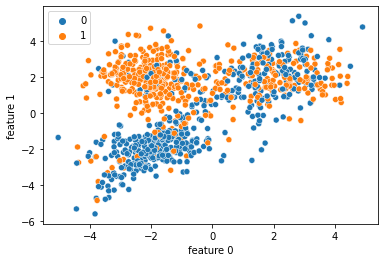

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.xlabel('feature 0')
plt.ylabel('feature 1');

We can do it in three dimensions in this way:

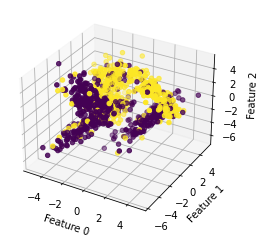

In [6]:
fig = plt.figure()             # Define a figure
ax = fig.add_subplot(111, projection='3d')   # Add a subplot

# scatterplot for three dimensions
ax.scatter(X[:,0], X[:,1], X[:,2], c = y)  #c=y means colored with the y values

# Beschriftung der Achsen
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')

plt.show()

For validation, a train-test split is performed.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Since neural networks are very sensitive to feature scaling, they are still being standardized.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

The labels are so far only stored in a numpy array. In order for the neural network to be able to process the labels, one-hot encoding must be applied. For this the function to_categorical of keras can be used.

In [13]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

Here the hyperparameters are defined, which will be used later for the construction and training of the network.

In [14]:
# hyperparameters
batch_size = 128
hidden_units = 500
num_epochs = 200

num_classes=len(np.unique(y_train))
input_size=len(x_train[0])

Here is a small description of each hyperparameter:

- _batch_size_: Number of samples per gradient update
- _hidden_units_: Number of neurons per hidden layer
- _num_epochs_: Number of epochs for the training


- _num_classes_: Number of categories in the dataset
- _input_size_: Number of features in the dataset

Now the first model can be built. For this, we use Keras' Sequential API, as in the last notebooks. 

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [16]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2000      
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               2

We use a Multi Layer Perceptron (MLP) (or Fully Connected Network) with 4 hidden layers of 500 neurons each. This network is clearly oversized for this classification task. Such a large topology is chosen here to better show the regularization. 

The following method compiles the network and starts the training. This function can also be used for the following tasks.

In [17]:
def start_training(model, learning_rate, epochs):
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])
    return model.fit(x_train_scaled, y_train_cat, epochs=epochs, 
                    validation_data=(x_test_scaled, y_test_cat),
                    batch_size=batch_size)

In [18]:
history = start_training(model=model, learning_rate=0.01, epochs=num_epochs)

Epoch 1/200
7/7 [==============================] - 1s 33ms/step - loss: 0.6952 - accuracy: 0.4975 - val_loss: 0.6939 - val_accuracy: 0.5300
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.6914 - accuracy: 0.5825 - val_loss: 0.6904 - val_accuracy: 0.6350
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.6878 - accuracy: 0.6687 - val_loss: 0.6870 - val_accuracy: 0.6800
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.6843 - accuracy: 0.7325 - val_loss: 0.6838 - val_accuracy: 0.7500
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.6810 - accuracy: 0.7550 - val_loss: 0.6806 - val_accuracy: 0.7600
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6776 - accuracy: 0.7837 - val_loss: 0.6775 - val_accuracy: 0.7800
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.6743 - accuracy: 0.7900 - val_loss: 0.6747 - val_accuracy: 0.7850
Epoch 8/200
7/7 [======

7/7 [==============================] - 0s 7ms/step - loss: 0.4392 - accuracy: 0.8512 - val_loss: 0.4675 - val_accuracy: 0.8100
Epoch 60/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4360 - accuracy: 0.8550 - val_loss: 0.4651 - val_accuracy: 0.8100
Epoch 61/200
7/7 [==============================] - 0s 8ms/step - loss: 0.4326 - accuracy: 0.8550 - val_loss: 0.4636 - val_accuracy: 0.8100
Epoch 62/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4301 - accuracy: 0.8550 - val_loss: 0.4618 - val_accuracy: 0.8100
Epoch 63/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4273 - accuracy: 0.8550 - val_loss: 0.4600 - val_accuracy: 0.8100
Epoch 64/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4248 - accuracy: 0.8537 - val_loss: 0.4587 - val_accuracy: 0.8100
Epoch 65/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4224 - accuracy: 0.8550 - val_loss: 0.4571 - val_accuracy: 0.8100
Epoch 66/200
7/7 [=============

7/7 [==============================] - 0s 9ms/step - loss: 0.3826 - accuracy: 0.8700 - val_loss: 0.4357 - val_accuracy: 0.8200
Epoch 118/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3823 - accuracy: 0.8662 - val_loss: 0.4356 - val_accuracy: 0.8200
Epoch 119/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3821 - accuracy: 0.8687 - val_loss: 0.4357 - val_accuracy: 0.8200
Epoch 120/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3818 - accuracy: 0.8712 - val_loss: 0.4360 - val_accuracy: 0.8200
Epoch 121/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3814 - accuracy: 0.8712 - val_loss: 0.4368 - val_accuracy: 0.8200
Epoch 122/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3812 - accuracy: 0.8700 - val_loss: 0.4354 - val_accuracy: 0.8200
Epoch 123/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3810 - accuracy: 0.8712 - val_loss: 0.4358 - val_accuracy: 0.8200
Epoch 124/200
7/7 [======

7/7 [==============================] - 0s 8ms/step - loss: 0.3731 - accuracy: 0.8725 - val_loss: 0.4281 - val_accuracy: 0.8250
Epoch 176/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3728 - accuracy: 0.8725 - val_loss: 0.4283 - val_accuracy: 0.8250
Epoch 177/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3727 - accuracy: 0.8725 - val_loss: 0.4283 - val_accuracy: 0.8250
Epoch 178/200
7/7 [==============================] - 0s 8ms/step - loss: 0.3727 - accuracy: 0.8712 - val_loss: 0.4285 - val_accuracy: 0.8250
Epoch 179/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3724 - accuracy: 0.8725 - val_loss: 0.4277 - val_accuracy: 0.8250
Epoch 180/200
7/7 [==============================] - 0s 8ms/step - loss: 0.3722 - accuracy: 0.8725 - val_loss: 0.4265 - val_accuracy: 0.8250
Epoch 181/200
7/7 [==============================] - 0s 9ms/step - loss: 0.3730 - accuracy: 0.8712 - val_loss: 0.4259 - val_accuracy: 0.8250
Epoch 182/200
7/7 [=======

This function can be used to visualize the training progress.

In [19]:
def plot_history(history):
    ax = pd.DataFrame(history.history).plot(figsize=(8, 5))
    ax.grid(True)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Epoch');

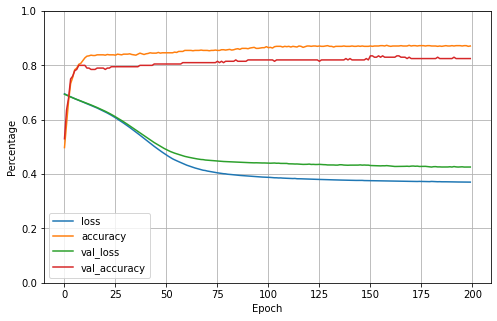

In [20]:
plot_history(history)

As the figure shows, the model does not tend to overfitting. Both the training and the test accuracy increase while the training and then remain at a high level. Therefore, no regularization is actually necessary. Nevertheless, we will implement the regularization methods presented in the book.

# Dropout

The first option the use of dropout layer in the network. These randomly select neurons according to the dropout rate, which are ignored when updating the weights, in order to distribute the load on the network.

In [ ]:
from keras.layers import Dropout

<div class="alert alert-block alert-success"><b>Task</b><br> 
Build a new model with the same architecture as the first model. Just add a dropout layer behind each layer using the specified dropout rate.
</div>

In [ ]:
dropout_rate = 0.5

model_do = Sequential()
# Write Your Code Here


In [ ]:
history_do = start_training(model=model_do, learning_rate=0.01, epochs=num_epochs)

In [ ]:
plot_history(history_do)

# L1 Regularization

L1 regularization (lasso regularization) adds “absolute value of magnitude” of coefficient as penalty term to the loss function. The key difference between to the L2 regularization (rigge regularization) is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. To find a optimal value for lambda a cross validation should be appied. But we take 0.0001 for now.

In [ ]:
from keras import regularizers

<div class="alert alert-block alert-success"><b>Task</b><br> 
Build a new model with the same architecture as the first model. But add to every Dense-Layer the defined regularizer. You can use the parameter kernel_regularizer.
</div>

In [ ]:
regularizer = regularizers.l1(0.0001)
model_l2 = Sequential()
# Write Your Code Here


In [ ]:
history_l2 = start_training(model=model_l2, learning_rate=0.01, epochs=num_epochs)

In [ ]:
plot_history(history_l2)

# Batch Normalization

Batch Norm is a normalization technique done between the layers of a Neural Network instead of in the raw data. It is done along mini-batches instead of the full data set. It serves to speed up training and use higher learning rates, making learning easier.

In [ ]:
from keras.layers import BatchNormalization

<div class="alert alert-block alert-success"><b>Task</b><br> 
Build a new model with the same architecture as the first model. Just add a BatchNormalization layer behind each layer.
</div>

In [ ]:
model_bn = Sequential()
# Write Your Code Here


In [ ]:
history_bn = start_training(model=model_bn, learning_rate=0.01, epochs=num_epochs)

In [ ]:
plot_history(history_bn)

# Early Stopping

The last method of regularization is EarlyStopping. In the last examples we have always trained with 200 epochs. As can be seen from the history, the accuracy does not change after a few epochs. If this occurs, the training is stopped early. For the implementation we have to fit the model again. But when calling the fit method, we must specify a EarlyStopping-callback. We have already done this last week. If you are no longer sure, take another look at the notebook from last week.

<div class="alert alert-block alert-success"><b>Task</b><br> 
Verwende das vorgegebene Modell mit 4 Hidden Layer mit jeweils 500 Neuronen und trainiere es erneut mit EarlyStopping. 
</div>

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
# Write Your Code Here


In [ ]:
plot_history(history_es)